# Nvidia Stock Predcition with LSTM

## Rationale
This project investigates the potential of using Long Short-Term Memory (LSTM) networks to predict the future stock prices of Nvidia (NVDA).

**Importance of Nvidia**

- Develops critical computer parts (GPUs) for:
 - Video Games
 - Self-driving Cars
 - Machine Learning Applications
- Involvement in these high-growth sectors positions Nvidia as a significant player in future technologies.

**Rationale for Stock Price Prediction**

- Investment Decisions: Accurately predicting stock prices allows investors to make informed decisions regarding buying or selling stocks, potentially leading to financial gains.
- Risk Management: By anticipating potential price drops, investors can take steps to mitigate losses by selling their holdings.

**Suitability of LSTMs**

- Pattern Recognition: LSTMs excel at identifying patterns in sequential data, which is ideal for analyzing historical stock prices and their fluctuations.
- Complex Data Handling: Stock prices are influenced by various factors. LSTMs can effectively handle this complex data, leading to more robust predictions.
- Adaptability: By incorporating diverse data points impacting Nvidia's stock (e.g., company performance, industry trends, market news), the LSTM model can be fine-tuned for improved prediction accuracy.
This project aims to leverage the strengths of LSTMs to develop a reliable model for forecasting Nvidia's stock prices. By understanding future price movements, investors can make strategic decisions and navigate the financial market with greater confidence.

## Literature Review
- **Stocks of year 2020: prediction of high variations in stock prices using LSTM**

  Recent advances in stock price prediction highlight the limitations of traditional models like ARIMA and SVM, particularly under the volatile market conditions of 2020. Deep learning techniques, especially Long Short-Term Memory (LSTM) models, have emerged as superior alternatives, adept at navigating the complex, non-linear patterns of stock movements. This shift towards LSTM and similar deep learning approaches marks a significant turning point in financial analytics, demonstrating their potential in delivering more accurate predictions and insights into market behaviors during periods of heightened volatility.Recent advances in stock price prediction highlight the limitations of traditional models like ARIMA and SVM, particularly under the volatile market conditions of 2020. Deep learning techniques, especially Long Short-Term Memory (LSTM) models, have emerged as superior alternatives, adept at navigating the complex, non-linear patterns of stock movements. This shift towards LSTM and similar deep learning approaches marks a significant turning point in financial analytics, demonstrating their potential in delivering more accurate predictions and insights into market behaviors during periods of heightened volatility.

- **Stock price prediction with optimized deep LSTM network with artificial rabbits optimization algorithm**

  In the evolving landscape of stock price prediction, the fusion of artificial intelligence (AI) with advanced analytical techniques like Long Short-Term Memory (LSTM) networks marks a significant leap forward. The introduction of the Artificial Rabbits Optimization (ARO) algorithm for optimizing LSTM hyperparameters showcases a novel approach, enhancing prediction accuracy by leveraging nature-inspired strategies. Comparative analysis reveals the superior performance of the LSTM-ARO model over traditional and other LSTM-optimized models across various metrics, underscoring its potential in navigating the complexities of financial market predictions. This progress highlights the growing synergy between bio-inspired algorithms and AI in refining predictive models for financial applications, setting new benchmarks for investment strategies and market analysis.
- **Novel optimization approach for stock price forecasting using multi-layered sequential LSTM**

  The study introduces a cutting-edge Multi-Layer Sequential Long Short-Term Memory (MLS LSTM) model optimized with the Adam optimizer for stock price forecasting. Outperforming traditional machine learning and deep learning algorithms, this model achieves exceptional accuracy in predicting stock prices by analyzing normalized time series data. Highlighting the model's practical utility in navigating the stock market's volatility, the research showcases the significant advantages of deep learning techniques in financial forecasting, offering a promising tool for investors and analysts.

**Reference**

Bathla, G., Rani, R. & Aggarwal, H. Stocks of year 2020: prediction of high variations in stock prices using LSTM. *Multimed Tools Appl* 82, 9727–9743 (2023). https://doi.org/10.1007/s11042-022-12390-5

B. Gülmez, “Stock price prediction with optimized deep LSTM network with artificial rabbits optimization algorithm,”*Expert Systems With Applications*, vol. 227, p. 120346, Oct. 2023, doi:10.1016/j.eswa.2023.120346.

A. Quadir *et al.*, “Novel optimization approach for stock price forecasting using multi-layered sequential LSTM,” *Applied Soft Computing*, vol. 134, p. 109830, Feb. 2023, doi: 10.1016/j.asoc.2022.109830.


### Import Module

In [34]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import quantstats as qs

Import Nvidia Stock data via yahoo finance api

In [6]:
# Target stock & columns for modeling
SYMBOL = "NVDA"

# End stock dates
end_date = datetime.now()

# Pulling stock data
df = yf.download(SYMBOL,start="2000-01-01",end="2023-12-31")
nvda = qs.utils.download_returns('NVDA')
nvda = nvda.loc['2000-07-01':datetime.now()]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Overview & EDA Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6037 entries, 2000-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6037 non-null   float64
 1   High       6037 non-null   float64
 2   Low        6037 non-null   float64
 3   Close      6037 non-null   float64
 4   Adj Close  6037 non-null   float64
 5   Volume     6037 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 330.1 KB


In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.098438,0.099219,0.091927,0.097526,0.089453,300912000
2000-01-04,0.095833,0.096094,0.090104,0.094922,0.087065,300480000
2000-01-05,0.092188,0.093750,0.090495,0.091797,0.084199,188352000
2000-01-06,0.091797,0.091797,0.082292,0.085807,0.078705,120480000
2000-01-07,0.085417,0.088151,0.084115,0.087240,0.080019,71184000


Take a look in descriptive statistics to understand the central tendency, dispersion, and shape of the dataset's distribution

In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Open,6037.0,4.386311e+00,8.998825e+00,6.083300e-02,2.931670e-01,4.631670e-01,4.014500e+00,5.021600e+01
High,6037.0,4.466029e+00,9.154864e+00,6.566700e-02,3.010000e-01,4.697500e-01,4.092750e+00,5.054800e+01
Low,6037.0,4.303590e+00,8.832108e+00,6.000000e-02,2.852500e-01,4.565000e-01,3.942000e+00,4.941200e+01
Close,6037.0,4.388294e+00,8.999854e+00,6.141700e-02,2.922500e-01,4.632500e-01,4.015750e+00,5.040900e+01
Adj Close,6037.0,4.360555e+00,9.000784e+00,5.633332e-02,2.680596e-01,4.352241e-01,3.982759e+00,5.039806e+01
Volume,6037.0,6.235054e+08,4.340209e+08,4.564400e+07,3.601960e+08,5.216280e+08,7.493720e+08,9.230856e+09


Check for missing values

In [10]:
df.isna().sum().to_frame(name='num_of_NaN')

,num_of_NaN
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [11]:
df.duplicated().sum()

0

### Visualize

**Candlestick Chart**: An interactive Plotly candlestick chart showing open, high, low, and close prices. This visualization provides a detailed view of daily price movements.

In [12]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'],
                                     name='Candlestick')])

fig.update_layout(title='NVDA Candlestick Chart',
                  xaxis=dict(title='Date', rangeslider=dict(visible=False)),
                  yaxis=dict(title='Price', rangemode='normal'))

fig.show()

**Stock Attributes**: Matplotlib is used to generate subplots for each stock attribute over the period, such as Open, High, Low, and Close prices.

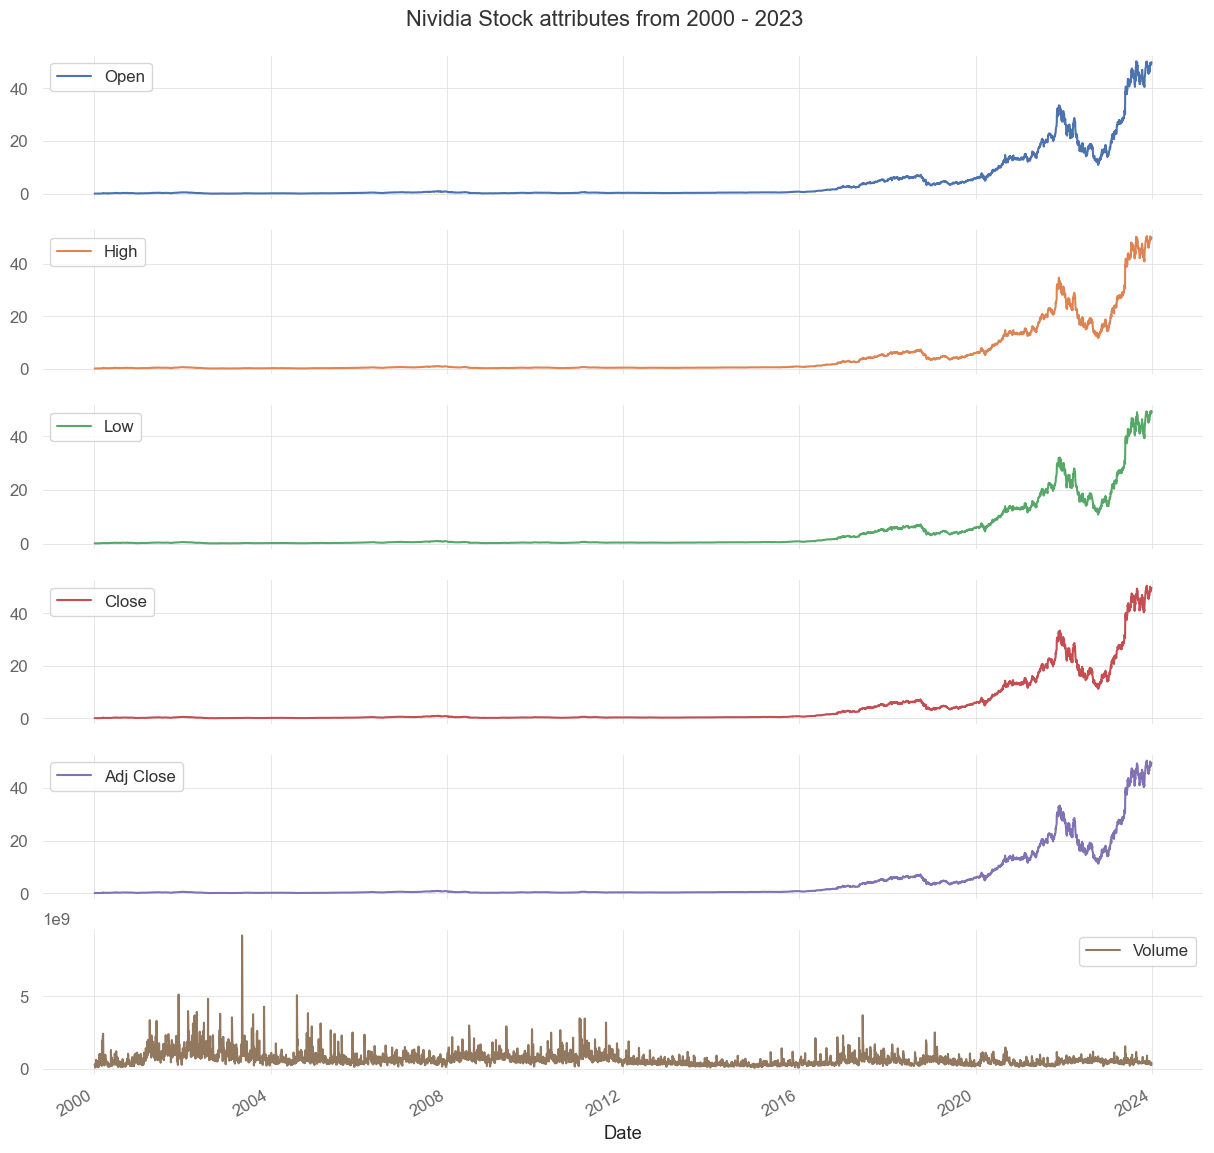

In [13]:
df.plot(subplots=True, figsize=(15, 15))
plt.suptitle('Nividia Stock attributes from 2000 - 2023', y=0.91)
plt.show()

**Moving Averages Comparison**: Calculation and plotting of 10, 20, and 50-day moving averages alongside the closing price to identify trends.

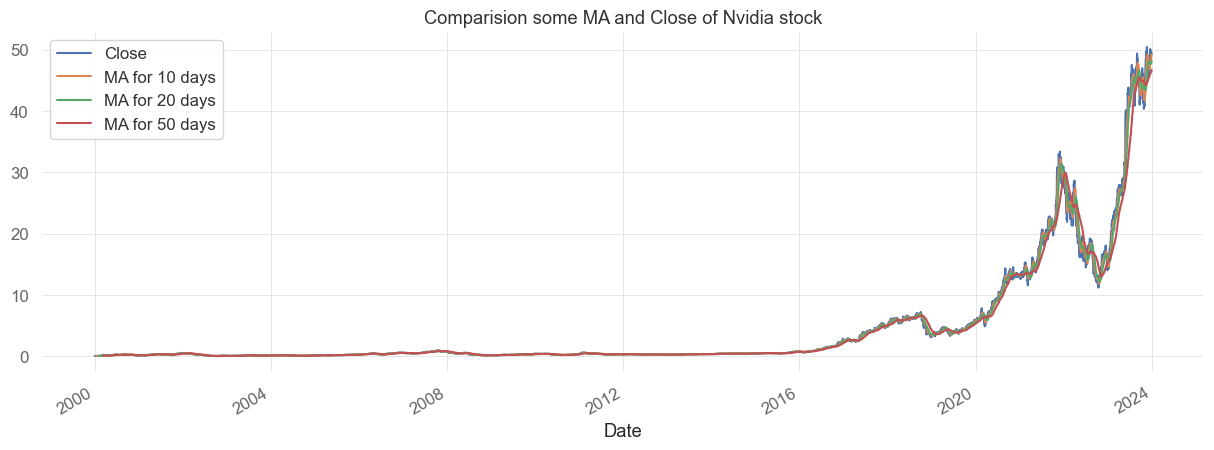

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    col_name = f'MA for {ma} days'
    df[col_name] = df['Close'].rolling(ma).mean()

df[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(15,5))
plt.title('Comparision some MA and Close of Nvidia stock')
plt.show()

**Daily Return Percentag**e: Visualization of the stock's daily return percentage, indicating the volatility.

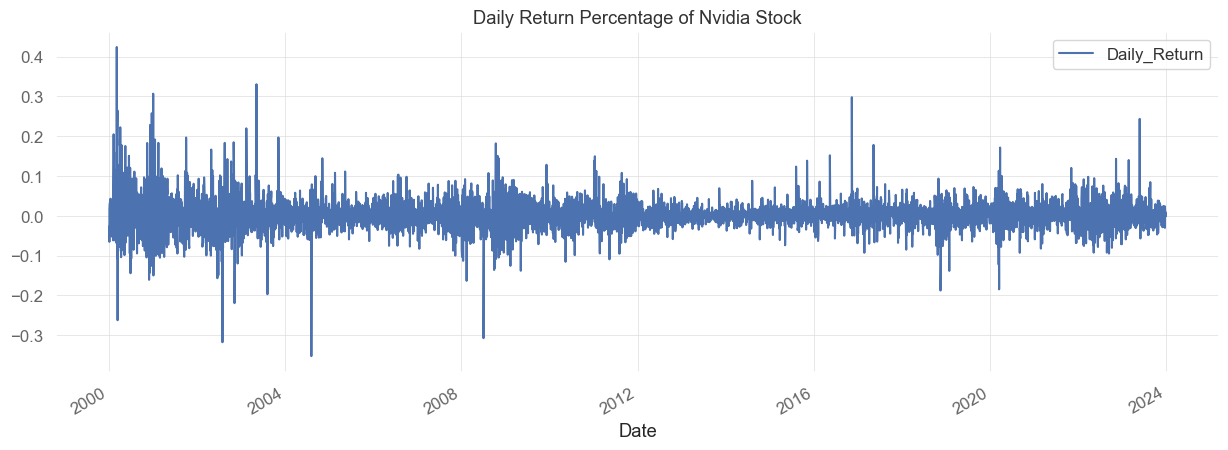

In [15]:
df['Daily_Return'] = df['Close'].pct_change()
df.Daily_Return.plot(legend=True, figsize=(15,5))
plt.title('Daily Return Percentage of Nvidia Stock')
plt.show()

The Python library QuantStat offers a powerful tool for analyzing stock data. It allows for in-depth examination of various metrics and performance characteristics, providing valuable insights for investors.

Ref: Ryšavý, J. (2022). M*achine learning for algorithmic trading of decentralized finances.* [Master’s thesis, Faculty of Informatics]. Brno University of Technology. https://is.muni.cz/th/xc3yt/Mgr_thesis_Rysavy-5.pdf

[*********************100%%**********************]  1 of 1 completed


                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2000-07-05   2000-07-05
End Period                 2024-08-02   2024-08-02
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          261.82%      42,018.20%
CAGR﹪                     3.75%        18.91%

Sharpe                     0.37         0.73
Prob. Sharpe Ratio         96.63%       99.98%
Smart Sharpe               0.37         0.72
Sortino                    0.52         1.09
Smart Sortino              0.52         1.08
Sortino/√2                 0.37         0.77
Smart Sortino/√2           0.37         0.76
Omega                      1.14         1.14

Max Drawdown               -56.47%      -89.72%
Longest DD Days            2446         3130
Volatility (ann.)          19.34%       56.87%
R^2                        0.32         0.32
Information Ratio          0.04         0.04
Calmar        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2002-01-04,2002-10-09,2006-11-10,1772,-89.722432,-87.672508
2,2007-10-18,2008-11-20,2016-05-12,3130,-85.078402,-81.638846
3,2000-09-29,2000-12-21,2001-04-19,203,-66.913931,-62.166064
4,2021-11-30,2022-10-14,2023-05-24,541,-66.362055,-64.381592
5,2018-10-02,2018-12-24,2020-02-13,500,-56.082389,-54.520323


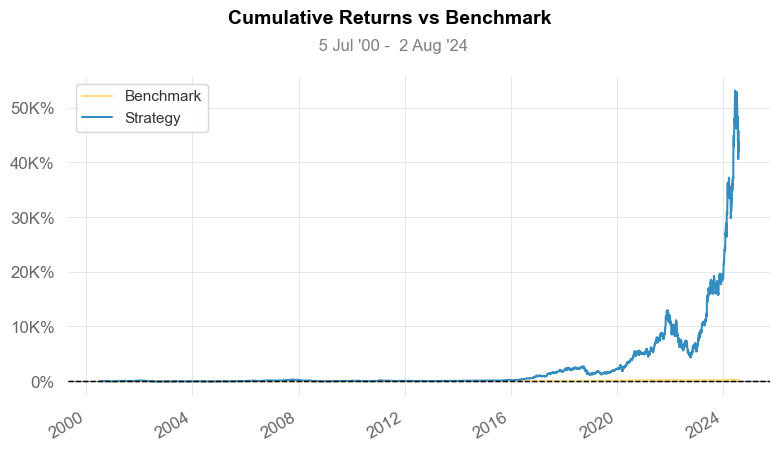

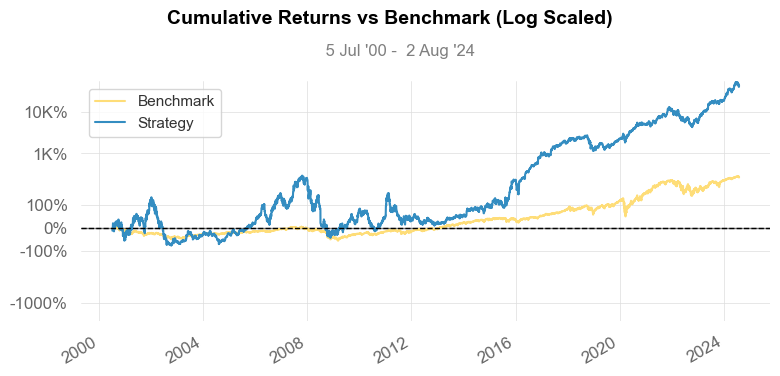

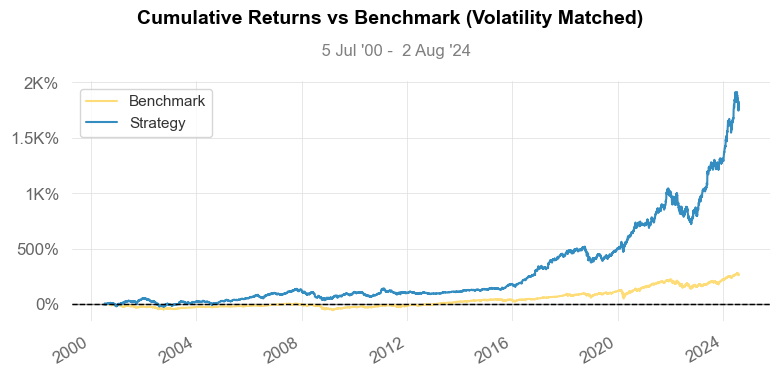

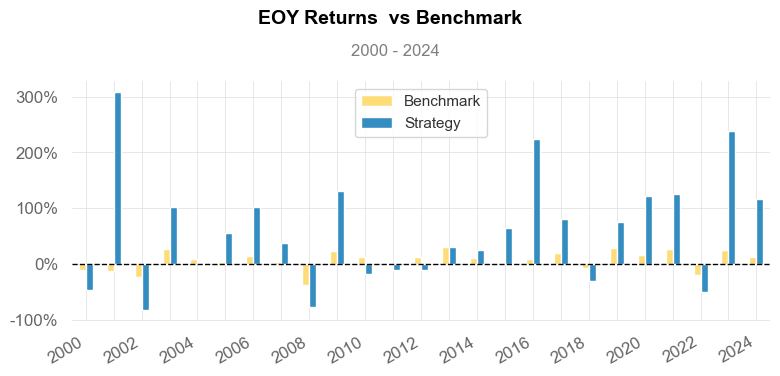

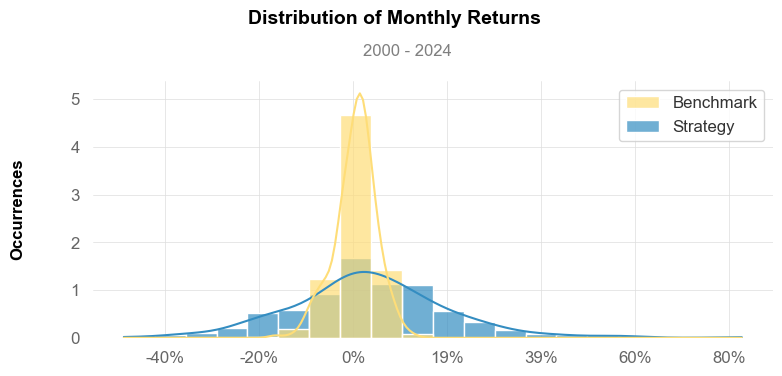

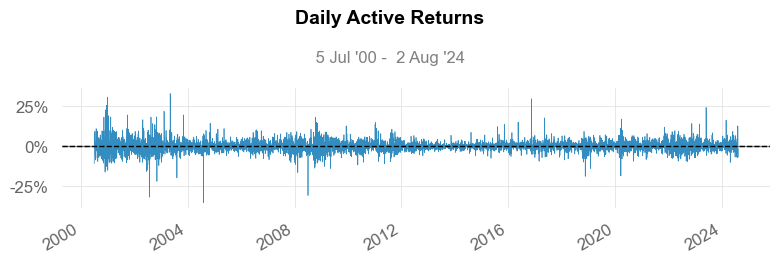

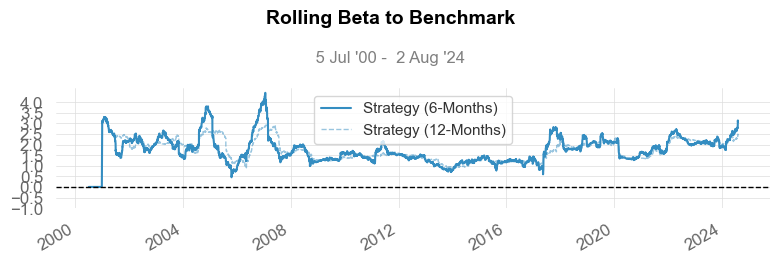

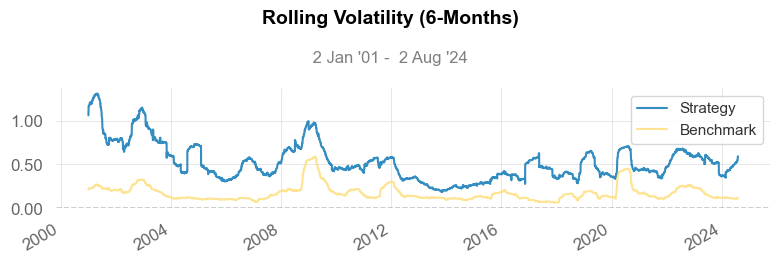

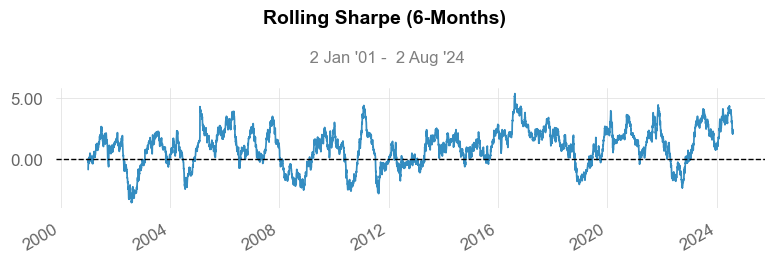

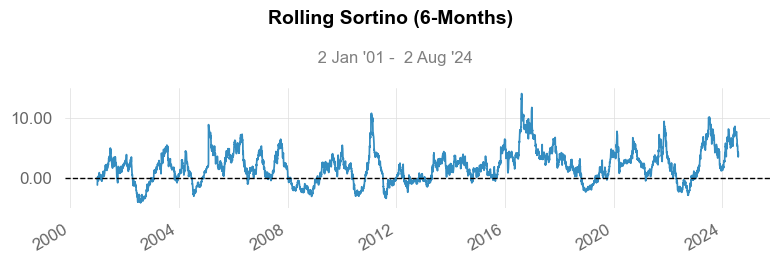

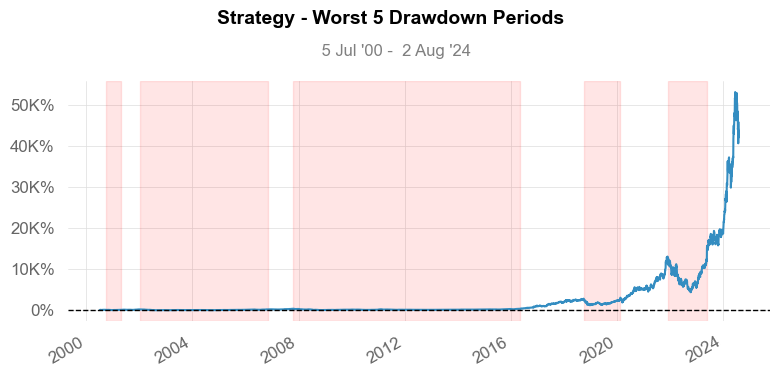

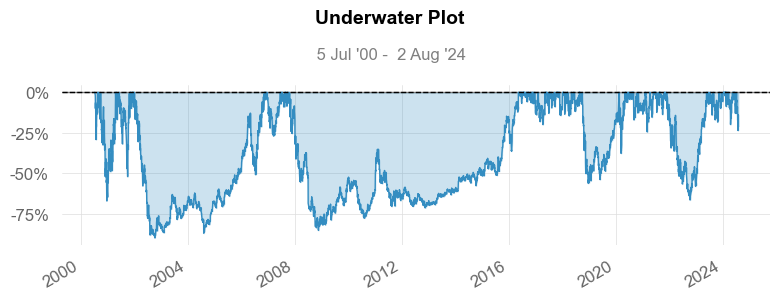

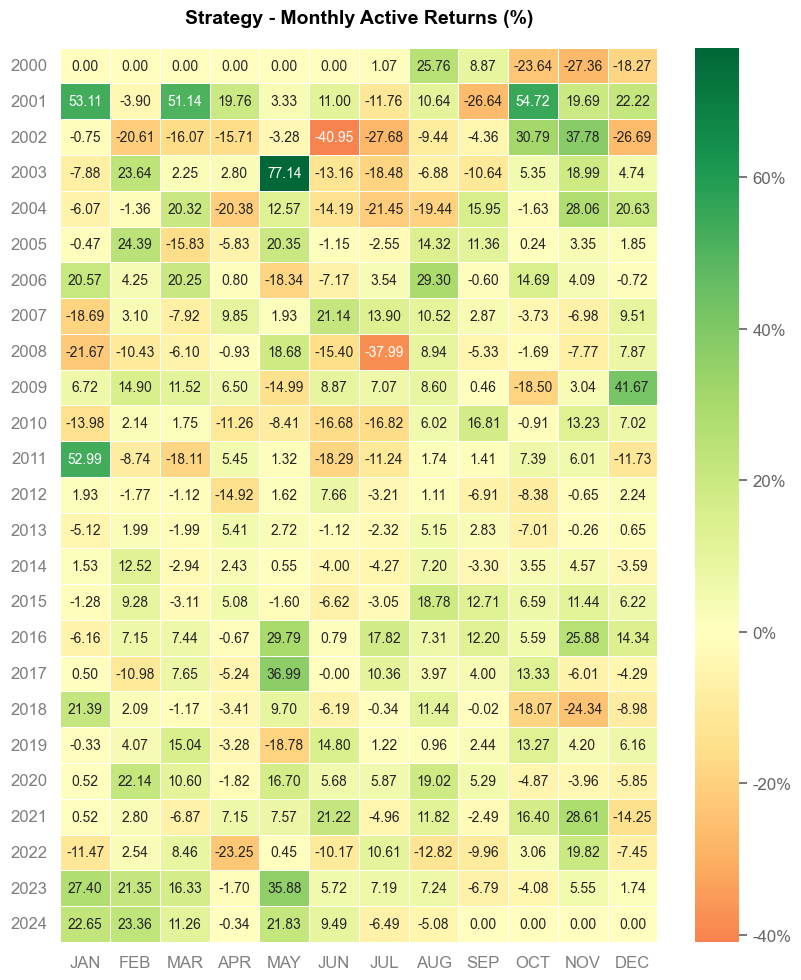

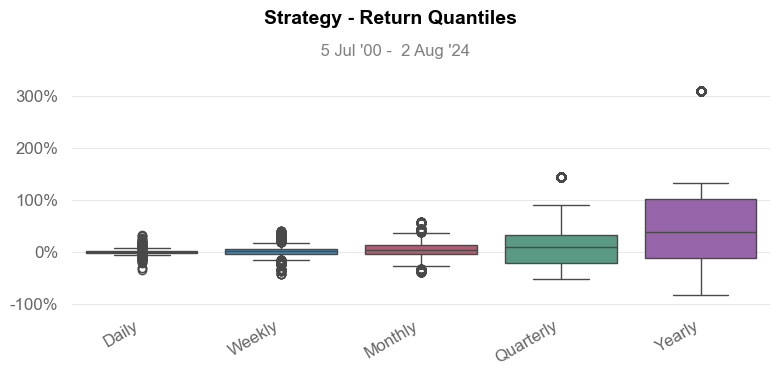

In [28]:
import warnings
warnings.filterwarnings("ignore")
qs.reports.full(nvda,'SPY')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

### Preparing Dataset

**Preprocess data** : By filtering, converting, and normalizing the 'Close' price data, to prepare the dataset for efficient and effective model training, ensuring our inputs are in a suitable format for LSTM.

In [17]:
data = df.filter(['Close'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

**Create scaled training and test data** : normalized 'Close' price data into training and test sets, allocating 80% for training and the rest, with a 60-day buffer (look-back), for testing. This setup is crucial for both training our models effectively and evaluating their performance on unseen data.


In [18]:
training_data_len = int(np.ceil(len(dataset) * 0.8))
train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

**Split into x_train and y_train and prepare x_test and the correct y_test** : generate training and test sequences from scaled data with a 60-day look-back period to train our model on predicting future stock prices, ensuring it learns from both historical trends and prepares for accurate future predictions.

In [19]:
#Train
look_back = 60
x_train, y_train = [], []
for i in range(look_back, len(train_data)):
    x_train.append(train_data[i-look_back:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Test
x_test, y_test = [], []
actual_prices = dataset[training_data_len:, :]
for i in range(look_back, len(test_data)):
    x_test.append(test_data[i-look_back:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### Build, Train & Test Models
The choice of two LSTM layers with 50 units each, followed by Dense layers with 25 and 1 unit(s) respectively, is tailored for stock price prediction. LSTM layers excel at capturing temporal patterns, and the number of units reflects the complexity of patterns to learn. The subsequent Dense layers distill this information for prediction, with the final layer outputting the predicted stock price. These configurations are optimized to balance model complexity and effectiveness in capturing and predicting stock price dynamics.

In [20]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_history = model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
4770/4770 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step - loss: 1.0182e-04 - val_loss: 9.9406e-04
Epoch 2/5
4770/4770 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - loss: 1.9290e-05 - val_loss: 0.0029
Epoch 3/5
4770/4770 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - loss: 1.0689e-05 - val_loss: 0.0014
Epoch 4/5
4770/4770 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 7.8851e-06 - val_loss: 0.0021
Epoch 5/5
4770/4770 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 8.1629e-06 - val_loss: 0.0041


Evaluate training loss and validation loss :  plot the model's training and validation loss over epochs to assess learning progress and overfitting

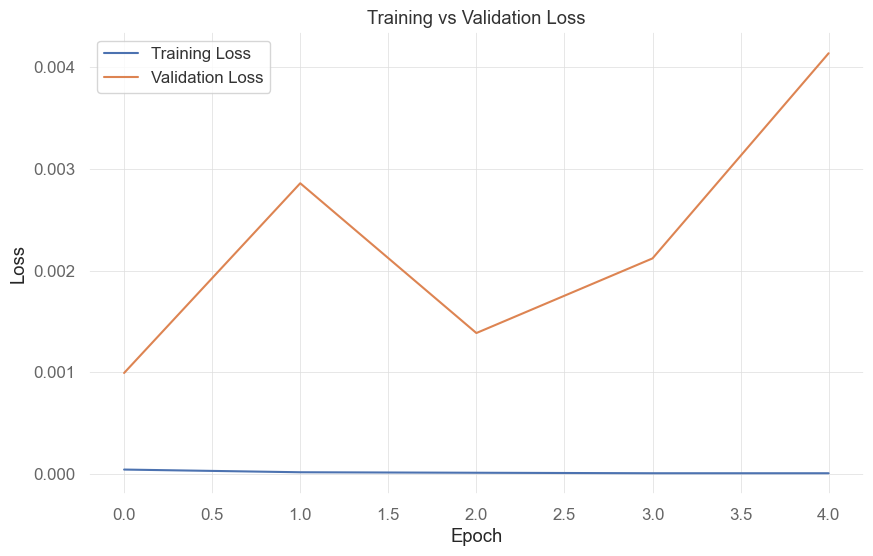

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Predicting

Generate predictions for the test set using our trained model and then apply inverse transformation to scale the predictions back to their original value range, enabling direct comparison with actual stock prices.

In [31]:
lstm_predictions = model.predict(x_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


The plot compares actual vs. predicted closing prices, highlighting the model's performance on training data and its predictive accuracy on unseen validation data, offering a visual evaluation of how closely the predictions align with actual market movements.

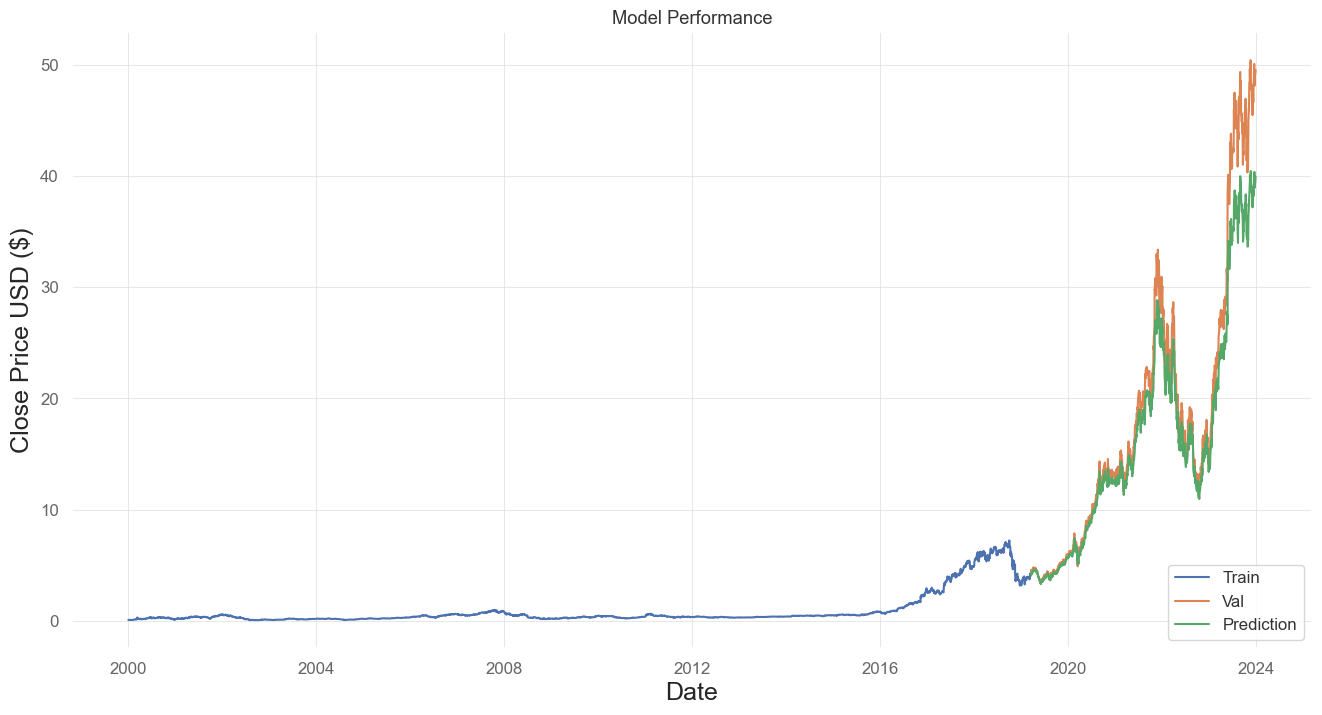

In [23]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model Performance')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

### Model Evaluation
Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE) to evaluate the model's predictive performance. MSE quantifies the average squared difference between actual and predicted values, while MAPE measures the average percentage difference. These metrics provide concise assessments of prediction accuracy.

In [35]:
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mse_lstm = mean_squared_error(actual_prices, lstm_predictions)
mae_lstm = mean_absolute_error(actual_prices, lstm_predictions)
rmse_lstm = np.sqrt(mse_lstm)
mape_lstm = calculate_mape(actual_prices, lstm_predictions)
r2_lstm = r2_score(actual_prices, lstm_predictions)
predict_price_series = pd.Series(lstm_predictions.flatten())
returns = predict_price_series.pct_change().dropna()
sharpe_ratio = qs.stats.sharpe(returns, rf=0.0)

print(f'LSTM Standalone - MSE: {round(mse_lstm, 2)}')
print(f'LSTM Standalone - MAE: {round(mae_lstm, 2)}')
print(f'LSTM Standalone - RMSE: {round(rmse_lstm, 2)}')
print(f'LSTM Standalone - MAPE: {round(mape_lstm, 2)}%')
print(f'LSTM Standalone - R²: {round(r2_lstm, 2)}')
print(f'LSTM Standalone - Sharpe Ratio: {round(sharpe_ratio, 2)}')

LSTM Standalone - MSE: 10.49
LSTM Standalone - MAE: 1.98
LSTM Standalone - RMSE: 3.24
LSTM Standalone - MAPE: 7.79%
LSTM Standalone - R²: 0.93
LSTM Standalone - Sharpe Ratio: 1.33


### Forcasting

this session is to predict stock prices for the next 30 days, utilizing the most recent 60 days of data as a foundation. Each new prediction was incorporated back into the dataset, creating a continuous forecast that was adjusted back to real-world scale. These future price predictions were visualized on a chart as a red dashed line, offering a clear view of potential price trends based on historical patterns.

In [25]:
forecasted_prices = []
current_batch = scaled_data[-look_back:]

for i in range(30):
    current_pred = model.predict(current_batch[-look_back:].reshape(1, look_back, 1))
    forecasted_prices.append(scaler.inverse_transform(current_pred))
    current_batch = np.append(current_batch, current_pred)[1:]

forecasted_prices = np.array(forecasted_prices).reshape(-1, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━

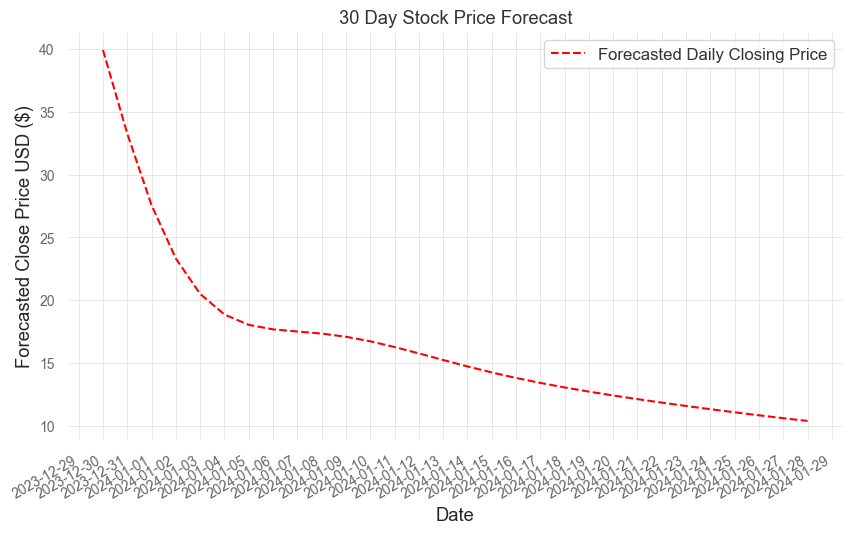

In [26]:
import matplotlib.dates as mdates
from datetime import timedelta

last_date = data.index[-1]

forecast_dates = [last_date + timedelta(days=i) for i in range(1, 31)]

plt.figure(figsize=(10, 6))
plt.plot(forecast_dates, forecasted_prices, label='Forecasted Daily Closing Price', color='red', linestyle='--')
plt.title('30 Day Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Forecasted Close Price USD ($)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()
plt.tick_params(axis='both', which='major', labelsize=10)

plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

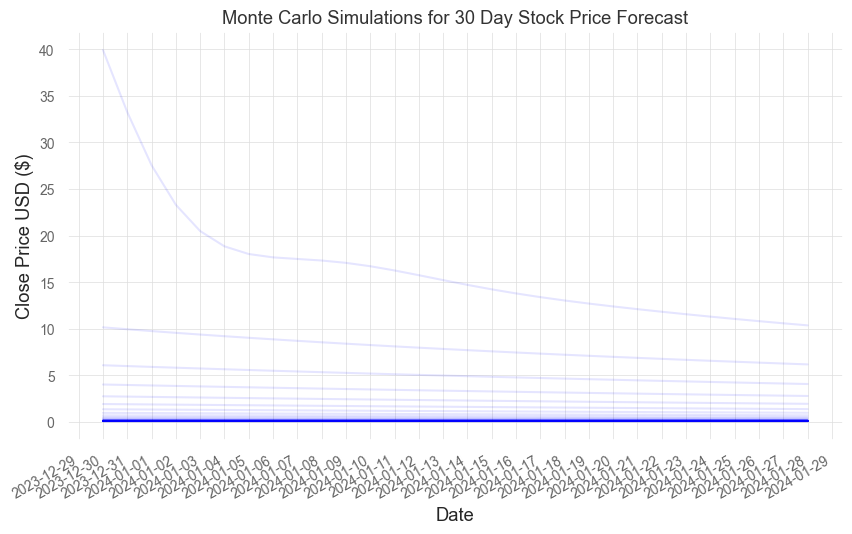

In [27]:

num_simulations = 50

price_paths = []
current_batch = scaled_data[-look_back:]

for _ in range(num_simulations):
    current_path = []
    for i in range(30):
        current_pred = model.predict(current_batch[-look_back:].reshape(1, look_back, 1))
        current_path.append(scaler.inverse_transform(current_pred))
        current_batch = np.append(current_batch, current_pred)[1:]
    price_paths.append(current_path)

plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(forecast_dates, np.array(price_paths[i]).flatten(), color='blue', alpha=0.1)
plt.title('Monte Carlo Simulations for 30 Day Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [36]:
monte_carlo_predictions = np.mean(price_paths, axis=0)
actual_prices_forecast = dataset[-30:]
mse_monte_carlo = mean_squared_error(actual_prices_forecast[:30], monte_carlo_predictions[:30])
mae_monte_carlo = mean_absolute_error(actual_prices_forecast[:30], monte_carlo_predictions[:30])
rmse_monte_carlo = np.sqrt(mse_monte_carlo)
mape_monte_carlo = calculate_mape(actual_prices_forecast[:30], monte_carlo_predictions[:30])
r2_monte_carlo = r2_score(actual_prices_forecast[:30], monte_carlo_predictions[:30])

print(f'LSTM + Monte Carlo - MSE: {round(mse_monte_carlo, 2)}')
print(f'LSTM + Monte Carlo - MAE: {round(mae_monte_carlo, 2)}')
print(f'LSTM + Monte Carlo - RMSE: {round(rmse_monte_carlo, 2)}')
print(f'LSTM + Monte Carlo - MAPE: {round(mape_monte_carlo, 2)}%')
print(f'LSTM + Monte Carlo - R²: {round(r2_monte_carlo, 2)}')

LSTM + Monte Carlo - MSE: 2245.61
LSTM + Monte Carlo - MAE: 47.37
LSTM + Monte Carlo - RMSE: 47.39
LSTM + Monte Carlo - MAPE: 98.14%
LSTM + Monte Carlo - R²: -1306.9


In [37]:
performance_comparison = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'RMSE', 'MAPE', 'R²'],
    'LSTM Standalone': [mse_lstm, mae_lstm, rmse_lstm, mape_lstm, r2_lstm],
    'LSTM + Monte Carlo': [mse_monte_carlo, mae_monte_carlo, rmse_monte_carlo, mape_monte_carlo, r2_monte_carlo]
})

In [39]:
performance_comparison.round(2)

,Metric,LSTM Standalone,LSTM + Monte Carlo
0,MSE,10.49,2245.61
1,MAE,1.98,47.37
2,RMSE,3.24,47.39
3,MAPE,7.79,98.14
4,R²,0.93,-1306.90


## Conclusion

This project aimed to predict future stock prices of Nvidia, a leading company in video game and autonomous vehicle components, using an advanced program. The program analyzed past stock price movements to make its predictions.

### LSTM Standalone Model
- **Mean Squared Error (MSE)**: 10.49 - This means the predictions were generally quite close to the actual prices.
- **Mean Absolute Error (MAE)**: 1.98 - On average, the predictions were off by about $2, which is pretty accurate.
- **Root Mean Squared Error (RMSE)**: 3.24 - This is another way to say the average error was around $3.24.
- **Mean Absolute Percentage Error (MAPE)**: 7.79% - The predictions were about 7.79% off from the actual prices, which is fairly precise.
- **R-squared (R²)**: 0.93 - The model could explain 93% of the actual price movements, showing it understood the trends quite well.

### LSTM + Monte Carlo Simulations
- **Mean Squared Error (MSE)**: 2245.61 - The predictions were way off, showing big errors.
- **Mean Absolute Error (MAE)**: 47.37 - On average, the predictions missed by about $47, which is very inaccurate.
- **Root Mean Squared Error (RMSE)**: 47.39 - The average error was about $47, indicating poor performance.
- **Mean Absolute Percentage Error (MAPE)**: 98.14% - The predictions were nearly 100% off, showing they were almost completely wrong.
- **R-squared (R²)**: -1306.90 - This very negative number means the model was doing much worse than even a simple guess.

### Summary
The LSTM standalone model did a good job of predicting Nvidia's stock prices, making small errors and understanding the price trends well. In contrast, the LSTM combined with Monte Carlo simulations performed very poorly, with large errors and a poor understanding of the price movements.

In simple terms, the standalone LSTM model is reliable and accurate, while the combined method with Monte Carlo simulations was not helpful and gave very bad predictions.

Overall, while using advanced tools like these can help in predicting stock prices, it’s important to remember they provide educated guesses, not guaranteed outcomes. They can guide decisions on buying or selling stocks, but should not be relied on as absolute predictions.